In [9]:
import geopandas as gpd
import pandas as pd
import numpy as np
import sompy
from sompy.visualization.mapview import View2D
from sompy.visualization.umatrix import UMatrixView
import matplotlib.pyplot as plt
from hkvportal.io.services import dataportal
import json
import pandas as pd
from io import StringIO
import warnings
warnings.filterwarnings('ignore')

# from IPython.core.interactiveshell import InteractiveShell
# InteractiveShell.ast_node_interactivity = "all"
%matplotlib inline

In [10]:
# function to get user feedback
def ask_user():
    check = str(input("upload results? (Y/N): ")).lower().strip()
    try:
        if check[0] == 'y':
            return True
        elif check[0] == 'n':
            return False
        else:
            print('Invalid Input')
            return ask_user()
    except Exception as error:
        print("Please enter valid inputs")
        print(error)
        return ask_user()
    
## Import up sound alert dependencies
from IPython.display import Audio, display

def user_sound():
    display(Audio(url='https://sound.peal.io/ps/audios/000/000/537/original/woo_vu_luvub_dub_dub.wav', autoplay=True))

In [11]:
file_name = r'D:\Projects\Pr\2877.20\toeleveringen\v2\Transectinfo_v2_metkorreldiameter.xlsx'

In [12]:
# open excel files and read all sheets
xl_file = pd.ExcelFile(file_name)

dfs = {sheet_name: xl_file.parse(sheet_name) 
          for sheet_name in xl_file.sheet_names}

In [13]:
# Initiate HKV dataportal
dp = dataportal()
dp.setDataservice(dataservice='https://data.hkvservices.nl/dataservices/')

# create db if not existing
dp.createDatabase(database='PR2877_20')

Init schema document for None
register_type('{http://www.w3.org/2001/XMLSchema}string', <zeep.xsd.types.builtins.String object at 0x00000000200B4D30>)
register_type('{http://www.w3.org/2001/XMLSchema}boolean', <zeep.xsd.types.builtins.Boolean object at 0x00000000200B4DA0>)
register_type('{http://www.w3.org/2001/XMLSchema}decimal', <zeep.xsd.types.builtins.Decimal object at 0x00000000200B4D68>)
register_type('{http://www.w3.org/2001/XMLSchema}float', <zeep.xsd.types.builtins.Float object at 0x00000000200B4C50>)
register_type('{http://www.w3.org/2001/XMLSchema}double', <zeep.xsd.types.builtins.Double object at 0x00000000200B4EB8>)
register_type('{http://www.w3.org/2001/XMLSchema}duration', <zeep.xsd.types.builtins.Duration object at 0x00000000200B4BE0>)
register_type('{http://www.w3.org/2001/XMLSchema}dateTime', <zeep.xsd.types.builtins.DateTime object at 0x00000000215813C8>)
register_type('{http://www.w3.org/2001/XMLSchema}time', <zeep.xsd.types.builtins.Time object at 0x00000000200B4BA

Init schema document for 'https://data.hkvservices.nl/dataservices/data.asmx?WSDL'
Add document with tns http://tempuri.org/AbstractTypes to schema 537609552
Ignoring import statement for namespace 'http://schemas.xmlsoap.org/soap/encoding/' (missing schemaLocation)
Auto importing missing known schema: http://schemas.xmlsoap.org/soap/encoding/
Starting new HTTP connection (1): schemas.xmlsoap.org
http://schemas.xmlsoap.org:80 "GET /soap/encoding/ HTTP/1.1" 200 3382
Init schema document for 'http://schemas.xmlsoap.org/soap/encoding/'
Add document with tns http://schemas.xmlsoap.org/soap/encoding/ to schema 537609552
register_attribute('{http://schemas.xmlsoap.org/soap/encoding/}root', <Attribute(name='root', type=<UnresolvedCustomType(qname='{http://schemas.xmlsoap.org/soap/encoding/}root', base_type=<UnresolvedType(qname='{http://www.w3.org/2001/XMLSchema}boolean')>)>)>)
register_attribute_group('{http://schemas.xmlsoap.org/soap/encoding/}commonAttributes', <zeep.xsd.elements.attribute

register_type('{http://schemas.xmlsoap.org/soap/encoding/}anyURI', <zeep.xsd.dynamic_types.anyURI object at 0x000000002383A9B0>)
register_element('{http://schemas.xmlsoap.org/soap/encoding/}QName', <Element(name='QName', type=<UnresolvedType(qname='{http://schemas.xmlsoap.org/soap/encoding/}QName')>)>)
register_type('{http://schemas.xmlsoap.org/soap/encoding/}QName', <zeep.xsd.dynamic_types.QName object at 0x000000002383AC88>)
register_element('{http://schemas.xmlsoap.org/soap/encoding/}string', <Element(name='string', type=<UnresolvedType(qname='{http://schemas.xmlsoap.org/soap/encoding/}string')>)>)
register_type('{http://schemas.xmlsoap.org/soap/encoding/}string', <zeep.xsd.dynamic_types.string object at 0x000000002383AF60>)
register_element('{http://schemas.xmlsoap.org/soap/encoding/}normalizedString', <Element(name='normalizedString', type=<UnresolvedType(qname='{http://schemas.xmlsoap.org/soap/encoding/}normalizedString')>)>)
register_type('{http://schemas.xmlsoap.org/soap/encodi

register_type('{http://schemas.xmlsoap.org/soap/encoding/}unsignedShort', <zeep.xsd.dynamic_types.unsignedShort object at 0x000000002348E978>)
register_element('{http://schemas.xmlsoap.org/soap/encoding/}unsignedByte', <Element(name='unsignedByte', type=<UnresolvedType(qname='{http://schemas.xmlsoap.org/soap/encoding/}unsignedByte')>)>)
register_type('{http://schemas.xmlsoap.org/soap/encoding/}unsignedByte', <zeep.xsd.dynamic_types.unsignedByte object at 0x000000002348EB38>)
register_element('{http://schemas.xmlsoap.org/soap/encoding/}positiveInteger', <Element(name='positiveInteger', type=<UnresolvedType(qname='{http://schemas.xmlsoap.org/soap/encoding/}positiveInteger')>)>)
register_type('{http://schemas.xmlsoap.org/soap/encoding/}positiveInteger', <zeep.xsd.dynamic_types.positiveInteger object at 0x000000002348ECF8>)
register_element('{http://schemas.xmlsoap.org/soap/encoding/}anyType', <Element(name='anyType', type=<zeep.xsd.types.any.AnyType object at 0x000000002348EC88>)>)
regist

dataservice is set. https://data.hkvservices.nl/dataservices/ will be used as portal


{'exception': 'database name already exists'}

In [14]:
# get the spatial connection file
shp_file_in = r'D:\Projects\Pr\2877.20\toeleveringen\transecten.shp'
gdf = gpd.read_file(shp_file_in)

GDAL_DATA: C:\Python35\Lib\site-packages\osgeo\data\gdal
PROJ_LIB: c:\python35\lib\site-packages\osgeo\data\proj
Got coordinate system
Failed to auto identify EPSG: 7
Params: b'+proj=sterea +lat_0=52.15616055555555 +lon_0=5.38763888888889 +k=0.9999079 +x_0=155000 +y_0=463000 +ellps=bessel +units=m +no_defs '
Index: 0
Got coordinate system
Flushed buffer
Stopped session


In [44]:
keys = list(dfs.keys()) #['T1T2']#
keys

['T5T6', 'T8T9', 'T2T3', 'T4T5', 'T7T8', 'T1T2', 'T6T7', 'T3T4']

In [45]:
keys = [keys[3]]

In [46]:
keys

['T4T5']

 Training...
--------------------------------------------------------------
 details: 
      > data len is 5695 and data dimension is 6
      > map size is 50,60
      > array size in log10 scale is 8.010766233518424
      > number of jobs in parallel: 1
 -------------------------------------------------------------

 pca_linear_initialization took: 0.059000 seconds
 Rough training...
 radius_ini: 8.000000 , radius_final: 2.000000, trainlen: 16



T4T5
maxtrainlen %d inf


 find_bmu took: 0.404000 seconds
 update_codebook_voronoi took: 0.022000 seconds
 epoch: 1 ---> elapsed time:  0.585000, quantization error: 1.095848

 find_bmu took: 0.505000 seconds
 update_codebook_voronoi took: 0.023000 seconds
 epoch: 2 ---> elapsed time:  0.673000, quantization error: 0.911601

 find_bmu took: 0.504000 seconds
 update_codebook_voronoi took: 0.016000 seconds
 epoch: 3 ---> elapsed time:  0.689000, quantization error: 0.772564

 find_bmu took: 0.505000 seconds
 update_codebook_voronoi took: 0.021000 seconds
 epoch: 4 ---> elapsed time:  0.675000, quantization error: 0.704107

 find_bmu took: 0.504000 seconds
 update_codebook_voronoi took: 0.021000 seconds
 epoch: 5 ---> elapsed time:  0.681000, quantization error: 0.662455

 find_bmu took: 0.505000 seconds
 update_codebook_voronoi took: 0.021000 seconds
 epoch: 6 ---> elapsed time:  0.673000, quantization error: 0.628785

 find_bmu took: 0.505000 seconds
 update_codebook_voronoi took: 0.012000 seconds
 epoch: 7 ---

maxtrainlen %d inf


 find_bmu took: 0.505000 seconds
 update_codebook_voronoi took: 0.021000 seconds
 epoch: 1 ---> elapsed time:  0.668000, quantization error: 0.240501

 find_bmu took: 0.505000 seconds
 update_codebook_voronoi took: 0.022000 seconds
 epoch: 2 ---> elapsed time:  0.680000, quantization error: 0.235766

 find_bmu took: 0.504000 seconds
 update_codebook_voronoi took: 0.018000 seconds
 epoch: 3 ---> elapsed time:  0.674000, quantization error: 0.228960

 find_bmu took: 0.504000 seconds
 update_codebook_voronoi took: 0.012000 seconds
 epoch: 4 ---> elapsed time:  0.659000, quantization error: 0.222580

 find_bmu took: 0.503000 seconds
 update_codebook_voronoi took: 0.014000 seconds
 epoch: 5 ---> elapsed time:  0.661000, quantization error: 0.216633

 find_bmu took: 0.504000 seconds
 update_codebook_voronoi took: 0.012000 seconds
 epoch: 6 ---> elapsed time:  0.679000, quantization error: 0.211356

 find_bmu took: 0.504000 seconds
 update_codebook_voronoi took: 0.015000 seconds
 epoch: 7 ---

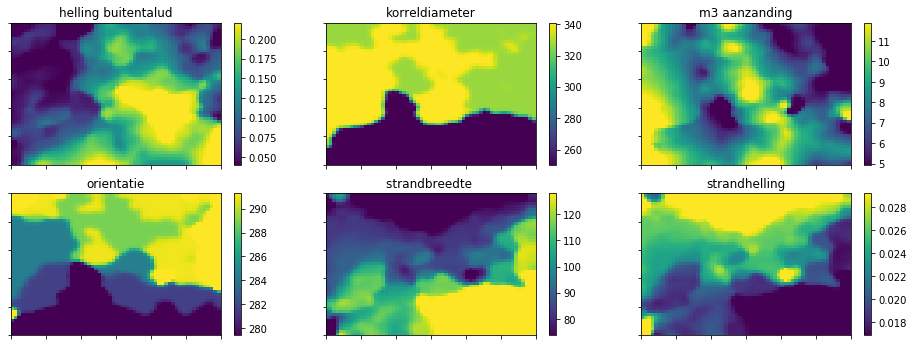

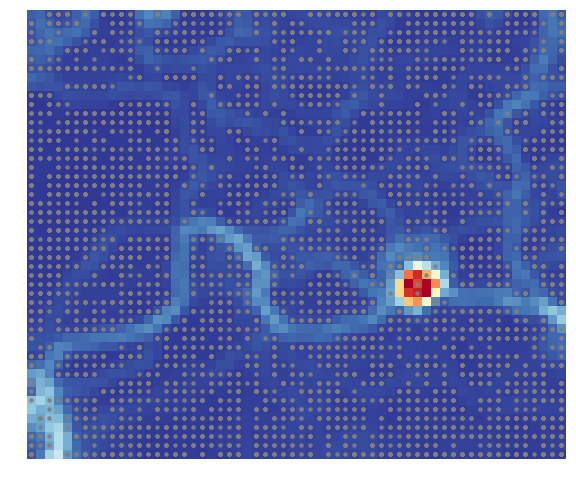

GDAL_DATA: C:\Python35\Lib\site-packages\osgeo\data\gdal
PROJ_LIB: c:\python35\lib\site-packages\osgeo\data\proj
Got coordinate system
Failed to auto identify EPSG: 7
Params: b'+proj=sterea +lat_0=52.15616055555555 +lon_0=5.38763888888889 +k=0.9999079 +x_0=155000 +y_0=463000 +ellps=bessel +units=m +no_defs '
Index: 0
Got coordinate system
Flushed buffer
Stopped session


{'y_0': 463000, 'lat_0': 52.15616055555555, 'k': 0.9999079, 'proj': 'sterea', 'no_defs': True, 'lon_0': 5.38763888888889, 'units': 'm', 'x_0': 155000, 'ellps': 'bessel'}
# one final check if all is fine


HTTP Post to https://data.hkvservices.nl/dataservices/data.asmx:
<?xml version='1.0' encoding='utf-8'?>
<soap-env:Envelope xmlns:soap-env="http://schemas.xmlsoap.org/soap/envelope/">
  <soap-env:Body>
    <ns0:create xmlns:ns0="http://tempuri.org/">
      <ns0:database>PR2877_20</ns0:database>
      <ns0:key>transectsT4T5</ns0:key>
      <ns0:description>Transects Duinen</ns0:description>
      <ns0:data>{"type": "FeatureCollection", "features": [{"type": "Feature", "id": "0", "properties": {"transectnummer": 2946, "som_key": 2820}, "geometry": {"type": "LineString", "coordinates": [[4.635041997144613, 52.72735342104867], [4.643874568590559, 52.72678210460547]]}}, {"type": "Feature", "id": "1", "properties": {"transectnummer": 2947, "som_key": 2820}, "geometry": {"type": "LineString", "coordinates": [[4.635043566879861, 52.7273623751606], [4.6438761401089685, 52.7267910586055]]}}, {"type": "Feature", "id": "2", "properties": {"transectnummer": 2948, "som_key": 2821}, "geometry": {"type

Resetting dropped connection: data.hkvservices.nl
https://data.hkvservices.nl:443 "POST /dataservices/data.asmx HTTP/1.1" 200 437
HTTP Response from https://data.hkvservices.nl/dataservices/data.asmx (status: 200):
<?xml version="1.0" encoding="utf-8"?><soap:Envelope xmlns:soap="http://schemas.xmlsoap.org/soap/envelope/" xmlns:xsi="http://www.w3.org/2001/XMLSchema-instance" xmlns:xsd="http://www.w3.org/2001/XMLSchema"><soap:Body><createResponse xmlns="http://tempuri.org/"><createResult>{"id": "2f9c8904-938d-4102-b318-d5ad65ff45a7", "key": "transectsT4T5", "date": "2018-05-16 08:23:48"}</createResult></createResponse></soap:Body></soap:Envelope>
HTTP Post to https://data.hkvservices.nl/dataservices/data.asmx:
<?xml version='1.0' encoding='utf-8'?>
<soap-env:Envelope xmlns:soap-env="http://schemas.xmlsoap.org/soap/envelope/">
  <soap-env:Body>
    <ns0:create xmlns:ns0="http://tempuri.org/">
      <ns0:database>PR2877_20</ns0:database>
      <ns0:key>somT4T5</ns0:key>
      <ns0:descript

https://data.hkvservices.nl:443 "POST /dataservices/data.asmx HTTP/1.1" 200 431
HTTP Response from https://data.hkvservices.nl/dataservices/data.asmx (status: 200):
<?xml version="1.0" encoding="utf-8"?><soap:Envelope xmlns:soap="http://schemas.xmlsoap.org/soap/envelope/" xmlns:xsi="http://www.w3.org/2001/XMLSchema-instance" xmlns:xsd="http://www.w3.org/2001/XMLSchema"><soap:Body><createResponse xmlns="http://tempuri.org/"><createResult>{"id": "766629ba-28e2-4f8d-8d61-ed95c0ab0559", "key": "somT4T5", "date": "2018-05-16 08:23:49"}</createResult></createResponse></soap:Body></soap:Envelope>


In [47]:
for key in keys:#list(dfs.keys()):
    print(key)
    T_from = key[0:2]
    T_to = key[2:4]

    # read sheet as DataFrame
    df = dfs[key]

    # get spatial key and filter columns
    shp_key = df['Transectnummer'].copy()
    # exclude some columns
    df = df[df.columns.difference(['Transectnummer', 'Tijdsstap', 'xzee', 'yzee', 'xland', 'yland', 'Profieltype',
                                   'breedte transect kustdwars', 'aanlegmoment'])]
    df = df.astype(np.float32)

    # drop NaN columns
    df.dropna(axis=1, how='all', inplace=True)
    X = df.as_matrix()
    # format all these values to three decimales

    # train a kohonen network
    mapsize = [50, 60]
    som = sompy.SOMFactory.build(X, mapsize, mask=None, mapshape='planar', lattice='rect',
                                 normalization='var', initialization='pca', neighborhood='gaussian',
                                 training='batch', component_names=df.columns, name='sompy')

    # verbose='debug' will print more, and verbose=None wont print anything
    som.train(n_job=1, verbose='debug')

    # view the codebook
    view2D = View2D(10, 10, "rand data", text_size=10)
    view2D.show(som, col_sz=3, which_dim="all", desnormalize=True)
    view2D.save(
        r'D:\Projects\Pr\2877.20\resultaten\png\d2018_05_16/som_codebook_{}.png'.format(key))

    # compute the umatrix
    u = sompy.umatrix.UMatrixView(
        50, 60, 'umatrix', show_axis=True, text_size=8, show_text=True)

    # and its values
    UMAT = u.build_u_matrix(som, distance=1, row_normalized=False)
    UMAT2 = u.show(som, distance2=1, row_normalized=False,
                   show_data=True, contooor=False, blob=False,
                   filename=r'D:\Projects\Pr\2877.20\resultaten\png\d2018_05_16//u_matrix_{}.png'.format(key))

    # get the coordinates from the derived network (codebook)
    codebook = som._normalizer.denormalize_by(
        som.data_raw, som.codebook.matrix)
    msz = som.codebook.mapsize
    cents = som.bmu_ind_to_xy(np.arange(0, msz[0] * msz[1]))

    yv = cents[:, 0].astype(int)
    xv = cents[:, 1].astype(int)
    xyv = cents[:, 2].astype(int)  # coordinates

    # combine the results from the kohonen network with the original data
    df_cb = pd.DataFrame(
        data=codebook, columns=df.columns.str.replace('_', ' '))  # keywords)
    df_cb['U-matrix'] = UMAT.flatten('C')
    df_cb['X'] = xv
    df_cb['Y'] = yv
    df_cb['XY'] = xyv

    # show codebook head
    df_cb.head()

    #df.columns = keywords
    df['transectnummer'] = shp_key.values.astype(int)
    df['som_key'] = som._bmu[0].astype(int)

    # get the spatial connection file
    shp_file_in = r'D:\Projects\Pr\2877.20\toeleveringen\transecten.shp'
    gdf = gpd.read_file(shp_file_in)

    # print and check the coordinate reference system
    print(gdf.crs)

    # Let's take a copy of our layer
    gdf_proj = gdf.copy()

    # Reproject the geometries by replacing the values with projected ones
    gdf_proj['geometry'] = gdf_proj['geometry'].to_crs(epsg=4326)

    gdf_proj.loc[:, 'transectnu'] = gdf_proj.loc[:, 'transectnu'].astype(int)
    gdf_proj.head()

    # reprojection seems right lets puts back
    gdf = gdf_proj

    # apply inner join with GeoDataFrame and DataFrame on the transectnummer
    gdf_merge_df = gdf.merge(df, left_on='transectnu',
                             right_on='transectnummer')

    # and select few columns
    # gdf_merge_df.head()
    gdf_sel = gdf_merge_df.loc[:, ['transectnummer', 'som_key', 'geometry']]

    # get the number transects belonging to each nodes in the kohonen network
    som_key_all = np.sort(gdf_sel['som_key'].values)
    unique, counts = np.unique(som_key_all, return_counts=True)
    df_counts = pd.DataFrame(np.array((unique.astype(int), counts)).T, columns=[
                             'som_key_unique', 'number of transects'])

    # combine the number of number of transects representing each node to the codebook dataframe
    df_cb_counts = pd.merge(df_cb, df_counts, left_on='XY',
                            right_on='som_key_unique', how='left')
    df_cb_counts.drop('som_key_unique', axis=1, inplace=True)

    # and set format to 3 decimals
    integer_columns = ['aanlegmoment', 'X', 'Y', 'XY', 'number of transects']
    df_cb_counts[df_cb_counts.columns.difference(integer_columns)] = df_cb_counts[df_cb_counts.columns.difference(
        integer_columns)].applymap("{0:.3f}".format)
    #df_cb_counts = df_cb_counts.applymap("{0:.3f}".format)

    # in the geodataframe we can drop the duplicates avoiding overlap
    gdf_dropdp = gdf_sel.drop_duplicates(subset=['transectnummer', 'som_key'])

    # one final check if all is fine
    print('# one final check if all is fine')
    gdf_dropdp.head()
    df_cb_counts.head()

    #user_sound()
    #answer = ask_user()
    answer = True
    if answer == True:
        # save the spatial GeoDataFrame to a geojson
        json_locs_out = r'D:\Projects\Pr\2877.20\resultaten\json\d2018_05_16\transect_locations_{}.json'.format(
            key)
        with open(json_locs_out, 'w') as f:
            f.write(gdf_dropdp.to_json())

        # and the codebook DataFrame to a csv
        csv_som_out = r'D:\Projects\Pr\2877.20\resultaten\csv\d2018_05_16\transect_som_codebook_{}.csv'.format(
            key)
        df_cb_counts.to_csv(csv_som_out, index=False)

        # load the spatial GeoJSON from file
        vega_spec = json.load(open(json_locs_out))
        # json data uploaden naar data portal
        dp.setEntryDatabase(database='PR2877_20', key='transects{}'.format(key),
                            data=json.dumps(vega_spec), description='Transects Duinen')

        output = StringIO()
        df_cb_counts.to_csv(output, index=False)

        dp.setEntryDatabase(database='PR2877_20', key='som{}'.format(key),
                            data=output.getvalue(), description='Self-organizing map Duinen for {}'.format(key))
    else:
        print('results for {} not saved and not uploaded'.format(key))